### 필수과제
- 트위터 데이터, 대통령 선거 관련 댓글 데이터
- 데이터에서 한글만 추출해서, 대통령 후보(문재인, 이재명, 이낙연) 이름이 있을 것
- 해당 지지자만 추출을 해서 지지자의 이름을 카운팅하여 얼마나 언급이 되었는지 체크해 주세요. (필수)
- 또한 기본적으로 해당 후보의 댓글들이 어떤 식의 문장이 많이 들어가 있는지 추가 분석해 주세요. (추가)
- (형태소분석, konlpy, (okt, 형태소 분석에 필요한 내용 구글링하시면 됩니다.))

In [15]:
import pandas as pd
import numpy as np

In [2]:
twt = pd.read_csv("tweet_jae.csv")

In [3]:
twt.head()

,status_id,screen_name,created_at,text
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,"""차기선호도 이재명 19% 이낙연 17%…첫 역전""(종합)https://t.co/n..."
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,"안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,..."
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,@yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...


### 후보별 언급량 비교

In [4]:
import jpype
from konlpy.tag import Okt

In [5]:
from collections import Counter

In [6]:
okt = Okt()

In [7]:
noun = okt.nouns("") # 초기화

In [8]:
for i in range(len(twt.text)):
    noun += okt.nouns(twt.text[i]) # nouns 함수로 명사 추출

In [9]:
count = Counter(noun) # Counter 함수로 단어 개수를 구함

In [10]:
noun_list = count.most_common(100) # 상위 100개 단어 추출

In [11]:
cand =  [(name, cnt) for name, cnt in noun_list if name in ["이재명","이낙연","문재인"]]
# 리스트에서 후보별 언급량 추출

In [12]:
cand

[('이재명', 10208), ('이낙연', 1226), ('문재인', 364)]

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
index = np.arange(len([i[0] for i in cand]))

([<matplotlib.axis.XTick at 0x279662f4ac0>,
 [Text(0, 0, '이재명'), Text(1, 0, '이낙연'), Text(2, 0, '문재인')])

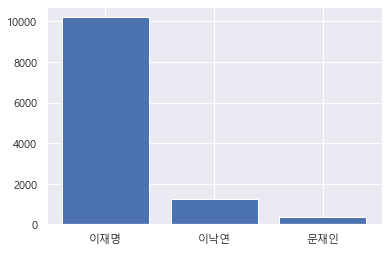

In [17]:
# 막대 그래프로 후보별 언급량 시각화
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False})
plt.bar(index, [i[1] for i in cand] )
plt.xticks(index, [i[0] for i in cand])

### 상위 100개 단어(명사) 워드클라우드

In [18]:
from wordcloud import WordCloud

In [19]:
wc = WordCloud(font_path="C:/study/fonts/NanumGothic.ttf", 
               background_color="white", width=2000, height=1000, 
               max_words=100,max_font_size=300)

In [20]:
wc.generate_from_frequencies(dict(noun_list))
# 앞에서 구한 리스트로 워드클라우드를 만듦

In [21]:
wc.to_file("wordcloud.png") # 경로에 워드클라우드 png 파일 생성

In [22]:
import imageio

In [23]:
img = imageio.imread("wordcloud.png")

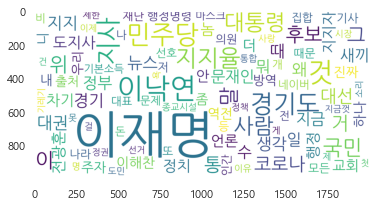

In [24]:
sns.set_style({'axes.grid' : False})
plt.imshow(img) # png 파일 확인

### 후보별 댓글 문장 분석

In [45]:
# 초기화 (단위: 어절)
cand1 = okt.phrases("")
cand2 = okt.phrases("")
cand3 = okt.phrases("")

In [46]:
# 댓글에 후보가 언급되었을 경우 각 후보 변수에 추가
for i in range(len(twt.text)):
    if "이재명" in twt.text[i]:
        cand1 += okt.phrases(twt.text[i])
    if "이낙연" in twt.text[i]:
        cand2 += okt.phrases(twt.text[i])
    if "문재인" in twt.text[i]:
        cand3 += okt.phrases(twt.text[i])

In [47]:
# 단어 개수를 구함
cnt1 = Counter(cand1)
cnt2 = Counter(cand2)
cnt3 = Counter(cand3)

In [49]:
# 후보별 상위 100개 단어 추출
list1 = cnt1.most_common(100)
list2 = cnt2.most_common(100)
list3 = cnt3.most_common(100)

In [50]:
list1

[('이재명', 8283),
 ('이낙연', 1021),
 ('경기도', 794),
 ('민주당', 788),
 ('지사', 773),
 ('지지율', 622),
 ('대통령', 496),
 ('코로나', 450),
 ('대선', 433),
 ('후보', 431),
 ('사람', 395),
 ('국민', 394),
 ('경기', 388),
 ('뉴스', 369),
 ('생각', 349),
 ('대권', 341),
 ('통당', 338),
 ('지금', 337),
 ('지지', 325),
 ('전광훈', 321),
 ('차기', 315),
 ('문재인', 314),
 ('정부', 302),
 ('하나', 267),
 ('정치', 264),
 ('역전', 251),
 ('이해찬', 250),
 ('진짜', 247),
 ('출처', 244),
 ('이재명 지사', 243),
 ('언론', 240),
 ('주자', 240),
 ('모든', 226),
 ('우리', 226),
 ('행정명령', 226),
 ('방역', 219),
 ('19%', 200),
 ('기사', 197),
 ('네이버', 195),
 ('도지사', 194),
 ('집합', 193),
 ('선호', 192),
 ('때문', 191),
 ('종교시설', 189),
 ('나라', 187),
 ('새끼', 186),
 ('재난', 185),
 ('17%', 184),
 ('제한', 182),
 ('이유', 181),
 ('이재명 경기지사', 180),
 ('이제', 177),
 ('국민들', 176),
 ('사랑', 175),
 ('문제', 173),
 ('행정', 171),
 ('네이버 뉴스', 165),
 ('사람들', 165),
 ('소리', 162),
 ('선거', 162),
 ('시장', 162),
 ('마스크', 160),
 ('행정력', 159),
 ('제일교회', 156),
 ('그냥', 156),
 ('의원', 152),
 ('전설', 148),
 ('정책', 147),
 ('공정', 

In [51]:
list2

[('이낙연', 1021),
 ('이재명', 1017),
 ('차기', 235),
 ('대선', 212),
 ('지지율', 198),
 ('후보', 197),
 ('19%', 196),
 ('17%', 183),
 ('대권', 174),
 ('민주당', 173),
 ('선호', 169),
 ('역전', 164),
 ('대통령', 152),
 ('주자', 151),
 ('이재명 19%', 136),
 ('의원', 101),
 ('행정력', 101),
 ('전설', 99),
 ('사람', 94),
 ('갤럽', 86),
 ('문재인', 85),
 ('지지', 85),
 ('첫 역전', 73),
 ('이낙연 17%', 71),
 ('하나', 70),
 ('우리', 69),
 ('의원님', 67),
 ('여론조사', 67),
 ('정치', 65),
 ('이재명 19% 이낙연', 64),
 ('이재명 19% 이낙연 17%', 64),
 ('뉴스', 61),
 ('지금', 58),
 ('이낙연 의원', 56),
 ('남자', 56),
 ('1위', 55),
 ('국민', 54),
 ('대권후보', 54),
 ('행정력 하나로', 53),
 ('행정력 하나로 대권후보', 53),
 ('행정력 하나로 대권후보 1위', 53),
 ('하나로', 53),
 ('대선주자', 52),
 ('통당', 51),
 ('지사', 50),
 ('대권후보 1위', 48),
 ('조국', 47),
 ('지금껏', 47),
 ('보지', 46),
 ('유형', 46),
 ('차기선호', 43),
 ('코로나', 43),
 ('지금껏 보지', 43),
 ('지금껏 보지 못', 43),
 ('지금껏 보지 못했던 새로운 유형', 43),
 ('지금껏 보지 못했던 새로운 유형의 대권후보', 43),
 ('마주', 43),
 ('당대표', 42),
 ('한국', 42),
 ('윤석열', 41),
 ('이유', 40),
 ('생각', 39),
 ('이낙연 제', 39),
 ('부동산', 38),
 ('지금

In [52]:
list3

[('이재명', 317),
 ('문재인', 314),
 ('이낙연', 87),
 ('대통령', 84),
 ('민주당', 82),
 ('정부', 50),
 ('문재인 대통령', 43),
 ('지지율', 40),
 ('지지', 33),
 ('조국', 33),
 ('정권', 27),
 ('대통령님', 25),
 ('지사', 23),
 ('국민', 21),
 ('후보', 21),
 ('대선', 21),
 ('지금', 20),
 ('지지자들', 19),
 ('문재인 정부', 19),
 ('사람', 18),
 ('이해찬', 18),
 ('사람들', 18),
 ('정치', 18),
 ('코로나', 18),
 ('문재인 대통령님', 16),
 ('노무현', 16),
 ('나라', 16),
 ('통당', 15),
 ('차기', 14),
 ('한국', 14),
 ('지지자', 14),
 ('전광훈', 14),
 ('문재인정부', 14),
 ('생각', 13),
 ('대권', 13),
 ('하나', 13),
 ('윤석열', 13),
 ('박원순', 13),
 ('보수', 13),
 ('다음', 12),
 ('이유', 12),
 ('절대', 12),
 ('도지사', 12),
 ('안철수', 12),
 ('정책', 12),
 ('국민들', 12),
 ('때문', 12),
 ('공격', 12),
 ('주자', 11),
 ('새끼', 11),
 ('이제', 11),
 ('언론', 10),
 ('세력', 10),
 ('출처', 10),
 ('경기도', 10),
 ('문재인대통령', 10),
 ('부동산', 10),
 ('대한민국', 9),
 ('의원', 9),
 ('인간', 9),
 ('gt', 9),
 ('결과', 9),
 ('얼마나', 9),
 ('조사', 9),
 ('뉴스', 9),
 ('위해', 9),
 ('탄핵', 9),
 ('하락', 9),
 ('기레기들', 9),
 ('존경', 9),
 ('친문', 8),
 ('가장', 8),
 ('당대표', 8),
 ('당시', 8),
 (

In [53]:
# 워드 클라우드 생성
wc1 = WordCloud(font_path="C:/study/fonts/NanumGothic.ttf", 
               background_color="white", colormap='Set2', 
               width=2000, height=1000, max_words=100,max_font_size=300)
wc1.generate_from_frequencies(dict(list1))
wc1.to_file("wc1.png")

In [61]:
wc2 = WordCloud(font_path="C:/study/fonts/NanumGothic.ttf", 
               background_color="white", colormap='Set2',
               width=2000, height=1000, max_words=100,max_font_size=300)
wc2.generate_from_frequencies(dict(list2))
wc2.to_file("wc2.png")

In [62]:
wc3 = WordCloud(font_path="C:/study/fonts/NanumGothic.ttf", 
               background_color="white", colormap='Set2',
               width=2000, height=1000, max_words=100,max_font_size=300)
wc3.generate_from_frequencies(dict(list3))
wc3.to_file("wc3.png")

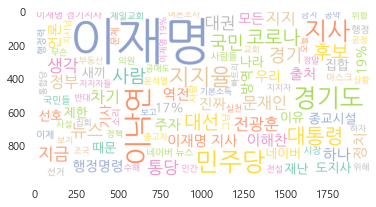

In [56]:
# 워드 클라우드 불러오기
img1 = imageio.imread("wc1.png")
plt.imshow(img1)

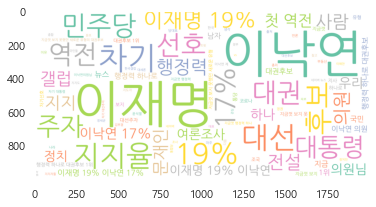

In [63]:
img2 = imageio.imread("wc2.png")
plt.imshow(img2)

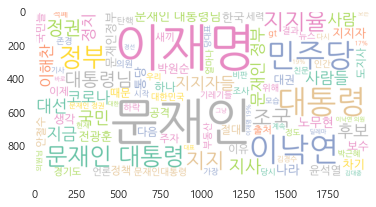

In [64]:
img3 = imageio.imread("wc3.png")
plt.imshow(img3)